In [1]:
import pandas as pd
import numpy as np

In [2]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [3]:
from random import seed
from random import random
seed(1)
random_nums = [random(), random()]
print(random_nums)

[0.13436424411240122, 0.8474337369372327]


In [4]:
seed(1)
print(random(), random())

0.13436424411240122 0.8474337369372327


In [5]:
from random import randint
seed(1)
[randint(40,60) for _ in range(4)]

[44, 58, 42, 48]

In [9]:
#How can I select rows from a DataFrame based on values in some column in Pandas?

# here are several ways to select rows from a Pandas dataframe:

#1.    Boolean indexing (df[df['col'] == value] )

#2.   Positional indexing (df.iloc[...])

#3.  Label indexing (df.xs(...))

#4.  df.query(...) API


In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})
print(df)

print(df.loc[df['A'] == 'foo'])

     A      B  C   D
0  foo    one  0   0
1  bar    one  1   2
2  foo    two  2   4
3  bar  three  3   6
4  foo    two  4   8
5  bar    two  5  10
6  foo    one  6  12
7  foo  three  7  14
     A      B  C   D
0  foo    one  0   0
2  foo    two  2   4
4  foo    two  4   8
6  foo    one  6  12
7  foo  three  7  14


In [11]:
print(df.loc[df['B'].isin(['one','three'])])

     A      B  C   D
0  foo    one  0   0
1  bar    one  1   2
3  bar  three  3   6
6  foo    one  6  12
7  foo  three  7  14


In [12]:
df = df.set_index(['B'])
print(df.loc['one'])


       A  C   D
B              
one  foo  0   0
one  bar  1   2
one  foo  6  12


In [13]:
df.loc[df.index.isin(['one','two'])]


,A,C,D
B,,,
one,foo,0,0
one,bar,1,2
two,foo,2,4
two,foo,4,8
two,bar,5,10
one,foo,6,12


In [14]:
import pandas as pd, numpy as np

df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})

In [15]:
mask = df['A'] == 'foo'
df[mask]

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [16]:
mask = df['A'] == 'foo'
pos = np.flatnonzero(mask)
df.iloc[pos]

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [17]:
df.query('A == "foo"')

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [18]:
%timeit mask = df['A'].values == 'foo'
%timeit mask = df['A'] == 'foo'

6.32 µs ± 452 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
96.5 µs ± 7.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#Evaluating the mask with the NumPy array is ~ 30 times faster. This is partly due to NumPy evaluation often being faster. It is also partly due to the lack of overhead necessary to build an index and a corresponding pd.Series object.

In [19]:
mask = df['A'].values == 'foo'
%timeit df[mask]
mask = df['A'] == 'foo'
%timeit df[mask]

187 µs ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
223 µs ± 8.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit df

22.2 ns ± 0.751 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [22]:
# alternate method 2

In [24]:
%timeit df[mask]
%timeit pd.DataFrame(df.values[mask], df.index[mask], df.columns).astype(df.dtypes)


220 µs ± 46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.61 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
np.random.seed([3,1415])
d1 = pd.DataFrame(np.random.randint(10, size=(10, 5)), columns=list('ABCDE'))

d1

,A,B,C,D,E
0,0,2,7,3,8
1,7,0,6,8,6
2,0,2,0,4,9
3,7,3,2,4,3
4,3,6,7,7,4
5,5,3,7,5,9
6,8,7,6,4,7
7,6,2,6,6,5
8,2,8,7,5,8
9,4,7,6,1,5


In [26]:
%%timeit
mask = d1['A'].values == 7
d1[mask]

163 µs ± 5.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
%%timeit
mask = d1['A'].values == 7
pd.DataFrame(d1.values[mask], d1.index[mask], d1.columns)


83.7 µs ± 7.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [28]:
# alternate method 3

In [29]:
mask = df['A'].isin(['foo'])
df[mask]

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [30]:
mask = np.in1d(df['A'].values, ['foo'])
df[mask]

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [32]:
#benchmarking

In [48]:
import timeit

In [92]:
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})
print(df)


     A      B  C   D
0  foo    one  0   0
1  bar    one  1   2
2  foo    two  2   4
3  bar  three  3   6
4  foo    two  4   8
5  bar    two  5  10
6  foo    one  6  12
7  foo  three  7  14


In [93]:
def mask_standard(df):
    mask = df['A'] == 'foo'
    return df[mask]

def mask_standard_loc(df):
    mask = df['A'] == 'foo'
    return df.loc[mask]

def mask_with_values(df):
    mask = df['A'].values == 'foo'
    return df[mask]

def mask_with_values_loc(df):
    mask = df['A'].values == 'foo'
    return df.loc[mask]

def query(df):
    return df.query('A == "foo"')

def xs_label(df):
    return df.set_index('A', append=True, drop=False).xs('foo', level=-1)

def mask_with_isin(df):
    mask = df['A'].isin(['foo'])
    return df[mask]

def mask_with_in1d(df):
    mask = np.in1d(df['A'].values, ['foo'])
    return df[mask]

In [95]:
df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
2,foo,two,2,4
3,bar,three,3,6
4,foo,two,4,8
5,bar,two,5,10
6,foo,one,6,12
7,foo,three,7,14


In [96]:
for j in res.columns:
    d = pd.concat([df] * j, ignore_index=True)
    for i in res.index:
        stmt = '{}(d)'.format(i)
        setp = 'from __main__ import d, {}'.format(i)
        res.at[i, j] = timeit.timeit(stmt, setp, number=50)


In [97]:
res

,10,30,100,300,1000,3000,10000,30000
mask_standard,0.036935,0.017157,0.019280,0.025603,0.052427,0.115878,0.329747,0.887801
mask_standard_loc,0.024973,0.016826,0.019468,0.025129,0.056912,0.110676,0.321178,1.028593
mask_with_values,0.013766,0.009267,0.012506,0.013134,0.026093,0.054154,0.145085,0.449356
mask_with_values_loc,0.012602,0.009195,0.010830,0.013158,0.028436,0.047314,0.171441,0.474247
query,0.097984,0.072680,0.087058,0.081854,0.145544,0.121543,0.330127,0.768628
xs_label,0.069008,0.054630,0.073708,0.082586,0.136237,0.197732,0.523563,2.049914
mask_with_isin,0.017158,0.017488,0.022741,0.028306,0.039431,0.060575,0.191330,0.668291
mask_with_in1d,0.010574,0.010376,0.013009,0.017529,0.027886,0.049612,0.151409,0.477092


In [98]:
res.div(res.min())

,10,30,100,300,1000,3000,10000,30000
mask_standard,3.492812,1.865921,1.780267,1.949437,2.009259,2.449149,2.272781,1.975721
mask_standard_loc,2.361606,1.829959,1.797562,1.913340,2.181132,2.339197,2.213722,2.289038
mask_with_values,1.301843,1.007874,1.154732,1.000000,1.000000,1.144578,1.000000,1.000000
mask_with_values_loc,1.191784,1.000000,1.000000,1.001880,1.089786,1.000000,1.181656,1.055392
query,9.266120,7.904239,8.038571,6.232424,5.577936,2.568882,2.275398,1.710510
xs_label,6.525864,5.941254,6.805858,6.288160,5.221234,4.179180,3.608661,4.561896
mask_with_isin,1.622570,1.901867,2.099840,2.155217,1.511197,1.280295,1.318745,1.487219
mask_with_in1d,1.000000,1.128391,1.201234,1.334636,1.068719,1.048578,1.043588,1.061725


In [99]:
np.random.seed([3,1415])
d1 = pd.DataFrame(np.random.randint(10, size=(10, 5)), columns=list('ABCDE'))

def mask_with_values(df):
    mask = df['A'].values == 'foo'
    return df[mask]

def mask_with_in1d(df):
    mask = np.in1d(df['A'].values, ['foo'])
    return df[mask]

def reconstruct(df):
    v = df.values
    mask = np.in1d(df['A'].values, ['foo'])
    return pd.DataFrame(v[mask], df.index[mask], df.columns)

spec = pd.DataFrame(
    index=['mask_with_values', 'mask_with_in1d', 'reconstruct'],
    columns=[10, 30, 100, 300, 1000, 3000, 10000, 30000],
    dtype=float
)


In [100]:
for j in spec.columns:
    d = pd.concat([df] * j, ignore_index=True)
    for i in spec.index:
        stmt = '{}(d)'.format(i)
        setp = 'from __main__ import d, {}'.format(i)
        spec.at[i, j] = timeit.timeit(stmt, setp, number=50)


In [101]:
spec.div(spec.min())

,10,30,100,300,1000,3000,10000,30000
mask_with_values,1.016223,1.000000,1.000000,1.000000,1.000000,1.290640,1.118392,1.000000
mask_with_in1d,1.000000,1.089502,1.094633,1.029412,1.287283,1.000000,1.000000,1.249892
reconstruct,1.417903,1.764073,2.267079,2.349044,4.247107,2.410713,3.115507,4.132920


<AxesSubplot:>

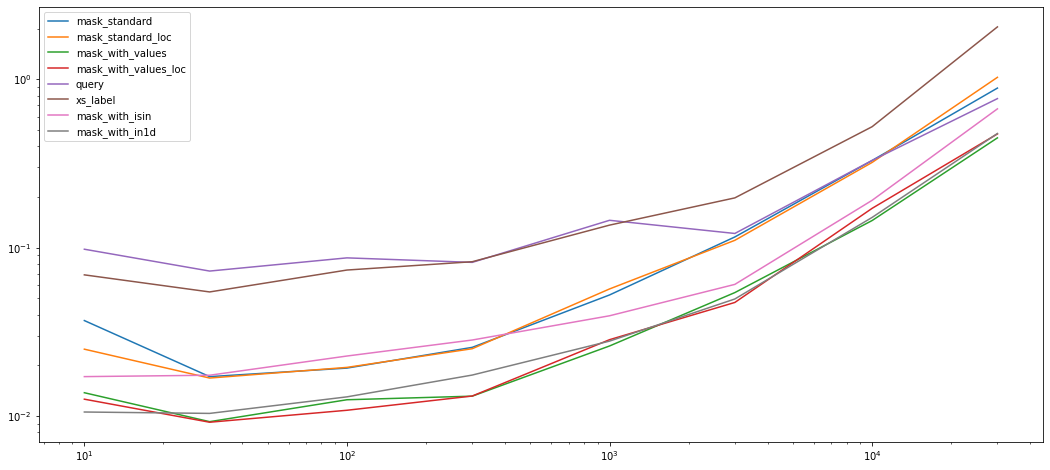

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
res.T.plot(loglog=True,figsize=(18,8))

<AxesSubplot:>

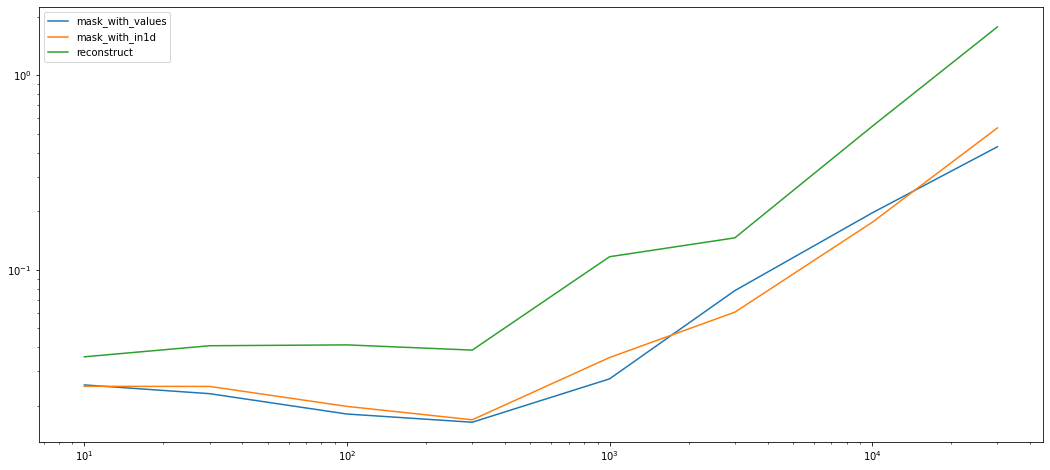

In [112]:
spec.T.plot(loglog=True,figsize=(18,8))

In [115]:
# how to read multiple files from a folder

In [140]:
# Import Module
import os

# Folder Path
path = "/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch"

# Change the directory
os.chdir(path)

def read_files(file_path):
    with open(file_path, 'r') as file:
        print(file.read())

# Iterate over all the files in the directory
for file in os.listdir():
    if file.endswith('.csv'):
      # Create the filepath of particular file
        file_path =f"{path}/{file}"

read_files(file_path)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

In [141]:
file_path

'/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch/titanic_train.csv'

In [155]:
import glob      
path = '/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch/*.csv' 

glob.glob('*csv')

['shops.csv',
 'item_categories.csv',
 'USA_Housing.csv',
 'Supermarket.csv',
 'titanic_test.csv',
 'items.csv',
 'loan_data.csv',
 'titanic_train.csv']

In [154]:
for dirname, _, files in os.walk("/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch"):
    for f in files:
        print(f)


.DS_Store
Untitled.ipynb
AI_Module 1_Lesson Plan.docx
shops.csv
Day 4 Python Program.ipynb
item_categories.csv
USA_Housing.csv
Supermarket.csv
Day 4 Python Programming Script.ipynb
titanic_test.csv
items.csv
Day 3 v1 Python Program.ipynb
loan_data.csv
titanic_train.csv
Day 3 v3 Python Programming Script-checkpoint.ipynb
Day 3 v2 Python Program-checkpoint.ipynb
Untitled-checkpoint.ipynb
Day 3 v1 Python Program-checkpoint.ipynb


In [160]:
import glob      
#path = '/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch/titanic*.csv' 

glob.glob('/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch/titanic*.csv')

['/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch/titanic_test.csv',
 '/Users/pradmishra/Desktop/Reva University/MTech in AI Course/AI-03 Batch/titanic_train.csv']

In [161]:
#speed test

In [163]:
# 1D
import pandas as pd
import random
import numpy as np
import time

random.seed(15)
n = 1000000

A = random.choices(range(1000),k=n)
df= pd.DataFrame(A, columns= ["A"])

a = time.time()
r1 = df[df.A>500]
b = time.time()
c = time.time()
r2 = pd.eval('df[df.A>500]')
d = time.time()
e = time.time()
r3 = df.query('A>500')
f = time.time()
print(np.allclose(r1, r2, r3))
print(b-a)
print(d-c)
print(f-e)


True
0.09057211875915527
0.23272299766540527
0.04969310760498047


In [1]:
# Python program to illustrate the concept
# of threading
# importing the threading module
import threading

def print_cube(num):
	"""
	function to print cube of given num
	"""
	print("Cube: {}".format(num * num * num))

def print_square(num):
	"""
	function to print square of given num
	"""
	print("Square: {}".format(num * num))

if __name__ == "__main__":
	# creating thread
	t1 = threading.Thread(target=print_square, args=(10,))
	t2 = threading.Thread(target=print_cube, args=(10,))

	# starting thread 1
	t1.start()
	# starting thread 2
	t2.start()

	# wait until thread 1 is completely executed
	t1.join()
	# wait until thread 2 is completely executed
	t2.join()

	# both threads completely executed
	print("Done!")


Square: 100
Cube: 1000
Done!


In [2]:
# Python program to illustrate the concept
# of threading
import threading
import os

def task1():
	print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
	print("ID of process running task 1: {}".format(os.getpid()))

def task2():
	print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
	print("ID of process running task 2: {}".format(os.getpid()))

if __name__ == "__main__":

	# print ID of current process
	print("ID of process running main program: {}".format(os.getpid()))

	# print name of main thread
	print("Main thread name: {}".format(threading.current_thread().name))

	# creating threads
	t1 = threading.Thread(target=task1, name='t1')
	t2 = threading.Thread(target=task2, name='t2')

	# starting threads
	t1.start()
	t2.start()

	# wait until all threads finish
	t1.join()
	t2.join()


ID of process running main program: 20588
Main thread name: MainThread
Task 1 assigned to thread: t1Task 2 assigned to thread: t2

ID of process running task 2: 20588
ID of process running task 1: 20588


In [8]:
# importing the multiprocessing module
import multiprocessing

# importing the multiprocessing module
import multiprocessing

def print_cube(num):
	"""
	function to print cube of given num
	"""
	print("Cube: {}".format(num * num * num))

def print_square(num):
	"""
	function to print square of given num
	"""
	print("Square: {}".format(num * num))

if __name__ == "__main__":
	# creating processes
	p1 = multiprocessing.Process(target=print_square, args=(10, ))
	p2 = multiprocessing.Process(target=print_cube, args=(10, ))

	# starting process 1
	p1.start()
	# starting process 2
	p2.start()

	# wait until process 1 is finished
	p1.join()
	# wait until process 2 is finished
	p2.join()

	# both processes finished
	print("Done!")


Done!


In [4]:
# importing the multiprocessing module
import multiprocessing
import os

def worker1():
	# printing process id
	print("ID of process running worker1: {}".format(os.getpid()))

def worker2():
	# printing process id
	print("ID of process running worker2: {}".format(os.getpid()))

if __name__ == "__main__":
	# printing main program process id
	print("ID of main process: {}".format(os.getpid()))

	# creating processes
	p1 = multiprocessing.Process(target=worker1)
	p2 = multiprocessing.Process(target=worker2)

	# starting processes
	p1.start()
	p2.start()

	# process IDs
	print("ID of process p1: {}".format(p1.pid))
	print("ID of process p2: {}".format(p2.pid))

	# wait until processes are finished
	p1.join()
	p2.join()

	# both processes finished
	print("Both processes finished execution!")

	# check if processes are alive
	print("Process p1 is alive: {}".format(p1.is_alive()))
	print("Process p2 is alive: {}".format(p2.is_alive()))


ID of main process: 20588
ID of process p1: 20777
ID of process p2: 20778
Both processes finished execution!
Process p1 is alive: False
Process p2 is alive: False
